In [2]:
import sys,os
sys.path.append(os.path.abspath(".."))

In [3]:
from OldQuantumWalkModule import operators as op
from OldQuantumWalkModule.oneDimQW import *
from OldQuantumWalkModule.berry import *
from OldQuantumWalkModule.plotting import *
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import pi
from numpy.linalg import eig
from scipy.linalg import expm
from sympy import *

In [4]:
sns.set_style("darkgrid")

In [19]:
dim = 40

bp = BerryPhase()

def berry_phase(th1,th2):
    coin_dict = {
        "th1" : th1,
        "th2" : th2,
        "n" : [0,1,0],
        "del" : 2,
    }
    model = nonUnitary_QW(dim,coin_dict)
    return bp.Calculate(model)

th_1 = np.arange(-2*np.pi,2*np.pi,0.1)
th_2 = np.arange(-2*np.pi,2*np.pi,0.1)
th_1, th_2 = np.meshgrid(th_1,th_2)

data_ans = np.vectorize(berry_phase)(th_1,th_2)

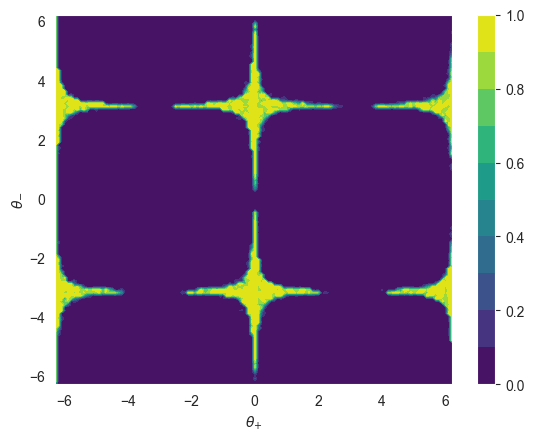

In [20]:
fig,ax = plt.subplots()

cax = ax.contourf(th_1,th_2,data_ans[0]/np.pi,cmap = "viridis", levels = 10)
fig.colorbar(cax)
ax.set_xlabel(r"$\theta_{+}$")
ax.set_ylabel(r"$\theta_{-}$")

plt.show()